In [1]:
import os, shutil
original_dataset_dir='/home/xwen/work_uestc/xin_project/catsdogs/train'
base_dir='/home/xwen/work_uestc/xin_project/catsdogs/smallsets'
#os.mkdir(base_dir)
train_dir=os.path.join(base_dir,'train')
#os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
#os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
#os.mkdir(test_dir)

train_cats_dir=os.path.join(train_dir,'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir=os.path.join(train_dir,'dogs')
#os.mkdir(train_dogs_dir)
validation_cats_dir=os.path.join(validation_dir,'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir=os.path.join(validation_dir,'dogs')
#os.mkdir(validation_dogs_dir)
test_cats_dir=os.path.join(test_dir,'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir=os.path.join(test_dir,'dogs')
#os.mkdir(test_dogs_dir)

fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [2]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

for data_batch,labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break
    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [5]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 42s 417ms/step - loss: 0.6945 - acc: 0.5305 - val_loss: 0.6757 - val_acc: 0.5890
Epoch 2/30
100/100 [==============================] - 41s 410ms/step - loss: 0.6697 - acc: 0.6070 - val_loss: 0.6553 - val_acc: 0.6080
Epoch 3/30
100/100 [==============================] - 40s 403ms/step - loss: 0.6326 - acc: 0.6515 - val_loss: 0.6354 - val_acc: 0.6290
Epoch 4/30
100/100 [==============================] - 40s 397ms/step - loss: 0.5922 - acc: 0.6765 - val_loss: 0.6133 - val_acc: 0.6420
Epoch 5/30
100/100 [==============================] - 40s 395ms/step - loss: 0.5520 - acc: 0.7180 - val_loss: 0.5858 - val_acc: 0.6870
Epoch 6/30
100/100 [==============================] - 40s 396ms/step - loss: 0.5164 - acc: 0.7505 - val_loss: 0.6227 - val_acc: 0.6640
Epoch 7/30
100/100 [==============================] - 40s 402ms/step - loss: 0.4833 - acc: 0.7655 - val_loss: 0.5977 - val_acc: 0.6790
Epoch 8/30
100/100 [==============================] - 4

In [6]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

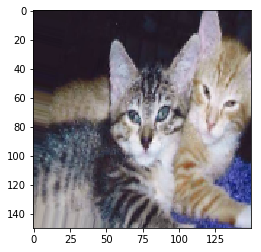

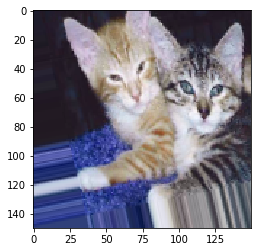

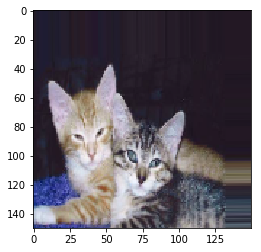

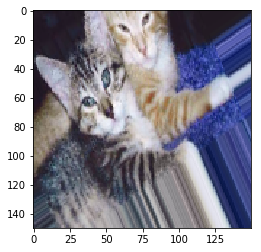

In [7]:
datagen=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
from keras.preprocessing import image 
fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path=fnames[3]
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break
    plt.show()

In [8]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 61s 608ms/step - loss: 0.6934 - acc: 0.5228 - val_loss: 0.6761 - val_acc: 0.5480
Epoch 2/100
100/100 [==============================] - 60s 599ms/step - loss: 0.6813 - acc: 0.5641 - val_loss: 0.6533 - val_acc: 0.5990
Epoch 3/100
100/100 [==============================] - 58s 581ms/step - loss: 0.6724 - acc: 0.5772 - val_loss: 0.6639 - val_acc: 0.5610
Epoch 4/100
100/100 [==============================] - 60s 598ms/step - loss: 0.6562 - acc: 0.6053 - val_loss: 0.6547 - val_acc: 0.5730
Epoch 5/100
100/100 [==============================] - 59s 590ms/step - loss: 0.6372 - acc: 0.6231 - val_loss: 0.6072 - val_acc: 0.6580
Epoch 6/100
100/100 [==============================] - 61s 612ms/step - loss: 0.6267 - acc: 0.6331 - val_loss: 0.6684 - val_acc: 0.6210
Epoch 7/100
100/100 [==============================] - 61s 613ms/step - loss: 0.6074 - acc: 0.6600 - val_loss: 0.6050 - val_acc: 0.6750
Epoch 

100/100 [==============================] - 59s 592ms/step - loss: 0.4223 - acc: 0.8009 - val_loss: 0.4753 - val_acc: 0.7680
Epoch 61/100
100/100 [==============================] - 58s 578ms/step - loss: 0.4109 - acc: 0.8147 - val_loss: 0.4240 - val_acc: 0.8130
Epoch 62/100
100/100 [==============================] - 60s 600ms/step - loss: 0.4199 - acc: 0.8009 - val_loss: 0.4384 - val_acc: 0.8060
Epoch 63/100
100/100 [==============================] - 58s 580ms/step - loss: 0.4127 - acc: 0.8125 - val_loss: 0.4723 - val_acc: 0.7950
Epoch 64/100
100/100 [==============================] - 57s 573ms/step - loss: 0.4061 - acc: 0.8166 - val_loss: 0.4197 - val_acc: 0.8080
Epoch 65/100
100/100 [==============================] - 59s 595ms/step - loss: 0.4171 - acc: 0.8056 - val_loss: 0.4223 - val_acc: 0.8210
Epoch 66/100
100/100 [==============================] - 57s 572ms/step - loss: 0.4032 - acc: 0.8231 - val_loss: 0.4609 - val_acc: 0.7930
Epoch 67/100
100/100 [==============================] 

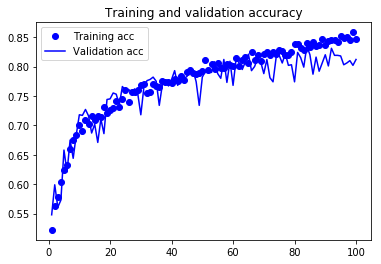

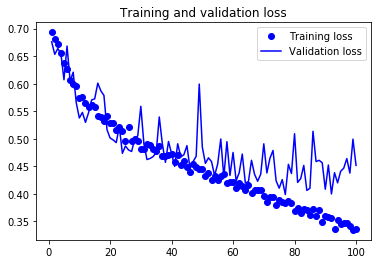

In [9]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [10]:
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [11]:
import os
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator

base_dir='/home/xwen/work_uestc/xin_project/catsdogs/smallsets'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

datagen=ImageDataGenerator(rescale=1./255)
batch_size=20
def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count))
    generator=datagen.flow_from_directory(directory,target_size=(150,150),batch_size=batch_size,class_mode='binary')
    i=0
    for inputs_batch,labels_batch in generator:
        features_batch=conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size]=features_batch
        labels[i*batch_size:(i+1)*batch_size]=labels_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    return features,labels
train_features,train_labels=extract_features(train_dir,2000)
validation_features,validation_labels=extract_features(validation_dir,1000)
test_features,test_labels=extract_features(test_dir,1000)
train_features=np.reshape(train_features,(2000,4*4*512))
validation_features=np.reshape(validation_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
from keras import models
from keras import layers
from keras import optimizers

model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])
history=model.fit(train_features,train_labels,epochs=30,batch_size=20,validation_data=(validation_features,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.5806 - acc: 0.6855 - val_loss: 0.4249 - val_acc: 0.8420
Epoch 2/30
2000/2000 [==============================] - 2s 922us/step - loss: 0.4212 - acc: 0.8085 - val_loss: 0.3561 - val_acc: 0.8480
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3438 - acc: 0.8515 - val_loss: 0.3216 - val_acc: 0.8640
Epoch 4/30
2000/2000 [==============================] - 2s 951us/step - loss: 0.3075 - acc: 0.8710 - val_loss: 0.2940 - val_acc: 0.8870
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2791 - acc: 0.8825 - val_loss: 0.2880 - val_acc: 0.8800
Epoch 6/30
2000/2000 [==============================] - 2s 927us/step - loss: 0.2539 - acc: 0.8975 - val_loss: 0.2696 - val_acc: 0.8940
Epoch 7/30
2000/2000 [==============================] - 2s 952us/step - loss: 0.2436 - acc: 0.9035 - val_loss: 0.2610 - val_acc: 0.8980
Epoch 

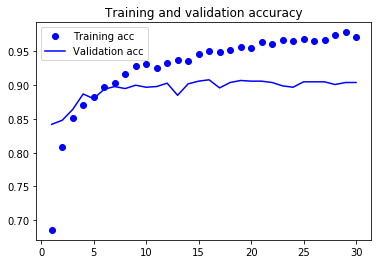

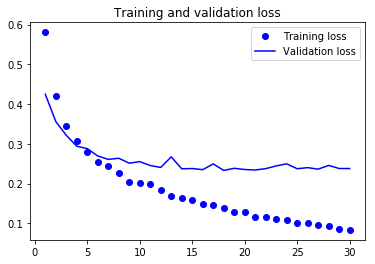

In [13]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=train_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 416s 4s/step - loss: 0.5577 - acc: 0.7270 - val_loss: 1.4923 - val_acc: 0.5450
Epoch 2/30
100/100 [==============================] - 412s 4s/step - loss: 0.4653 - acc: 0.7930 - val_loss: 0.4309 - val_acc: 0.8200
Epoch 3/30
100/100 [==============================] - 411s 4s/step - loss: 0.4653 - acc: 0.7955 - val_loss: 0.5627 - val_acc: 0.7180
Epoch 4/30
100/100 [==============================] - 412s 4s/step - loss: 0.4825 - acc: 0.7685 - val_loss: 0.3532 - val_acc: 0.8280
Epoch 5/30
100/100 [==============================] - 412s 4s/step - loss: 0.4926 - acc: 0.7960 - val_loss: 0.3374 - val_acc: 0.8370
Epoch 6/30
100/100 [==============================] - 412s 4s/step - loss: 0.4433 - acc: 0.8065 - val_loss: 0.6125 - val_acc: 0.6900
Epoch 7/30
100/100 [==============================] - 412s 4s/step - loss: 0.4684 - acc: 0.7965 - val_loss: 0.3838 - v

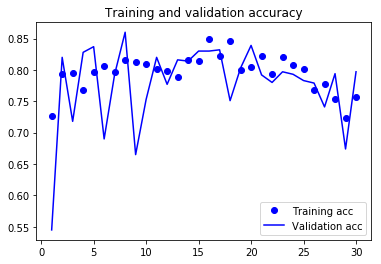

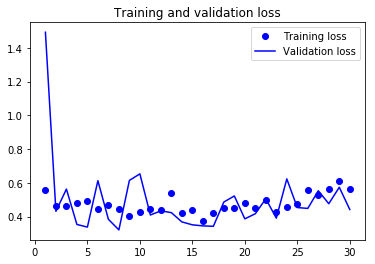

In [16]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [18]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 164s 2s/step - loss: 0.3937 - acc: 0.8385 - val_loss: 0.4063 - val_acc: 0.8180
Epoch 2/100
100/100 [==============================] - 161s 2s/step - loss: 0.3617 - acc: 0.8390 - val_loss: 0.5103 - val_acc: 0.8150
Epoch 3/100
100/100 [==============================] - 162s 2s/step - loss: 0.3817 - acc: 0.8330 - val_loss: 0.4040 - val_acc: 0.8330
Epoch 4/100
100/100 [==============================] - 162s 2s/step - loss: 0.3680 - acc: 0.8575 - val_loss: 0.3963 - val_acc: 0.8400
Epoch 5/100
100/100 [==============================] - 162s 2s/step - loss: 0.3539 - acc: 0.8500 - val_loss: 0.4652 - val_acc: 0.8360
Epoch 6/100
100/100 [==============================] - 162s 2s/step - loss: 0.3662 - acc: 0.8545 - val_loss: 0.4210 - val_acc: 0.8140
Epoch 7/100
100/100 [==============================] - 162s 2s/step - loss: 0.3430 - acc: 0.8615 - val_loss: 0.3707 - val_acc: 0.8280
Epoch 8/100
100/100 [==============================] - 163s 2s

Epoch 62/100
100/100 [==============================] - 160s 2s/step - loss: 0.3382 - acc: 0.8765 - val_loss: 0.3068 - val_acc: 0.8760
Epoch 63/100
100/100 [==============================] - 159s 2s/step - loss: 0.3072 - acc: 0.8705 - val_loss: 0.5132 - val_acc: 0.8140
Epoch 64/100
100/100 [==============================] - 161s 2s/step - loss: 0.3106 - acc: 0.8765 - val_loss: 0.3945 - val_acc: 0.8440
Epoch 65/100
100/100 [==============================] - 163s 2s/step - loss: 0.2795 - acc: 0.8820 - val_loss: 0.3726 - val_acc: 0.8740
Epoch 66/100
100/100 [==============================] - 161s 2s/step - loss: 0.2914 - acc: 0.8840 - val_loss: 0.3669 - val_acc: 0.8400
Epoch 67/100
100/100 [==============================] - 162s 2s/step - loss: 0.3211 - acc: 0.8740 - val_loss: 0.4428 - val_acc: 0.8490
Epoch 68/100
100/100 [==============================] - 162s 2s/step - loss: 0.3162 - acc: 0.8720 - val_loss: 0.4802 - val_acc: 0.7940
Epoch 69/100
100/100 [==============================] -

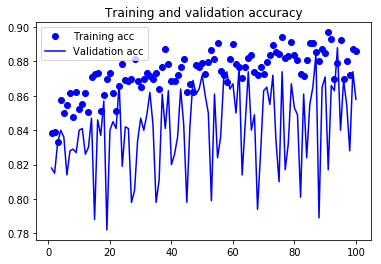

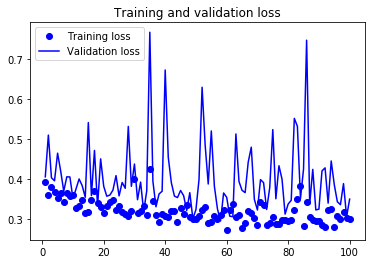

In [19]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')
print('begain')
test_loss,test_acc=model.evaluate_generator(test_generator,tesps=50)
print('test acc:',test_acc)